<a href="https://colab.research.google.com/github/Shruti-lab/Finding_Thief/blob/main/FindingTheif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Finding the Thief using Graph Theory**
Here we solve this problem as follows. The person whose node has number of incoming edges equal to number of people telling truth is the thief.

In [2]:
import networkx as nx
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/data.csv')
df

,Person,Statement
0,A,I'm not the thief
1,B,A is the thief
2,C,I'm not the thief


In [26]:
print(df.loc[1,'Statement'][:1])

A


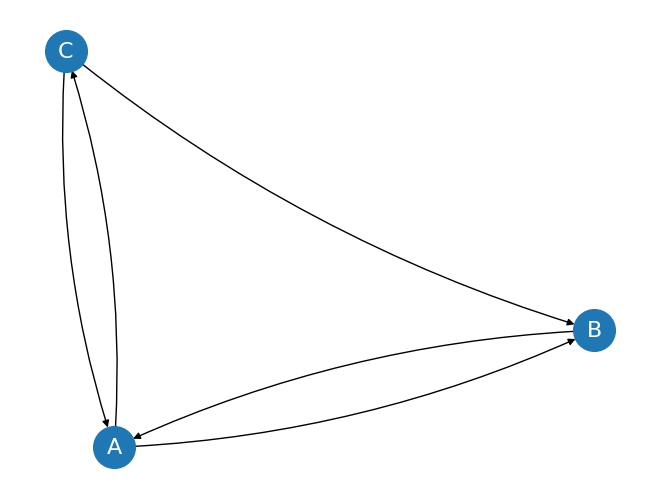

In [27]:
# Creating the graph for visualization

G = nx.MultiDiGraph()
def createGraph(df):
  for i in range(0,df.shape[0]):
    person = df.loc[i,'Person']
    if(df.loc[i,'Statement']=="I'm not the thief"):
      for j in range(0,df.shape[0]):
        if(df.loc[j,'Person']!=person):
          G.add_edge(person,df.loc[j,'Person'])   #add outgoing edge from that person1 to every other person, because it is accusing every other person
    else:
      #you are now accusing 1 person
      G.add_edge(person,df.loc[i,'Statement'][:1])  #getting the send person, person1 is accusing

    # print(person)
  # print(df.loc[0,'Statement'][2:])

createGraph(df);
nx.draw(G, with_labels=True,node_color="tab:blue",node_size=900,font_color="white",font_size=16, arrows = True, connectionstyle='arc3, rad = 0.1')
# https://stackoverflow.com/questions/35007046/how-to-draw-parallel-edges-in-networkx-graphviz


In [24]:
tellingTruth = int(input("Enter number of people telling the truth: "))
print(tellingTruth)

Enter number of people telling the truth: 1
1


In [55]:
# print(G.number_of_edges(G.in_edges(nbunch='A')))
# print(type(G.in_edges('A')))
# G.in_edges('A')
# print([('B', 'A') in G.in_edges('A')])
# print(G.number_of_edges('A','C'))
# print(len(G.in_edges('A')))


#Finding the thief
def findThief(df,tellingTruth):
  thief=[]
  for i in range(0,df.shape[0]):
    person = df.loc[i,'Person']
    inedges = len(G.in_edges(person))
    if(inedges==tellingTruth):
      thief.append(person)

  return thief


thief = findThief(df,tellingTruth)
print("Thief/Thieves is/are "+str(thief))

Thief/Thieves is/are ['C']
